# Classification in Practice

In this laboratory session we will gain some experience working with linear models for **classification** (we already saw how to do regression in a previous lab).

We will follow the same general structure... with one exception -- for this laboratory we will begin with **synthetic** datasets. 

## Part 1: Working with Synthetic Classification Problems

Generating synthetic datasets allows us to gain insight into how classifiers work. We will use some functionality of Scikit-learn to generate -- in a controlled manner -- synthetic classification problems of with various characteristics.

**Note**: When working with these synthetic datasets we will *not* go to the trouble of generating train/test splits -- we are only interested in studying how classifiers work to **separate** the training data.

### Exercise 1.1: Generating a dataset

First, have a look at the documentation for [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs). This is one of the easiest ways to generate /simple/ classification problems. Study the documentation and then use `make_blobs` to generate an **EASY** dataset for a **two-class** classification problem with 100 samples per class and 2 input features. What does **EASY** mean? How can we determine, qualitatively, that the randomly generated dataset is "easy"?

**Hint**: You will probably want to develop a *visualization* for datasets, and then *abstract* it into a function you can call later for other datasets. 

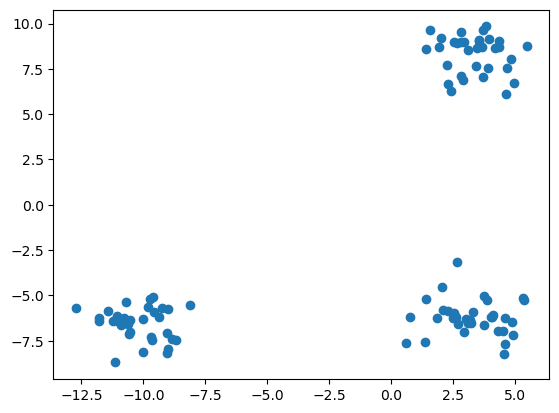

In [39]:
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

(Xs_easy, ys_easy) = make_blobs(n_samples=100, n_features=2)

def grafica(Xs_easy):
    plt.scatter([Xs_easy[i][0] for i in range(len(Xs_easy))], [Xs_easy[i][1] for i in range(len(Xs_easy))])
    return plt.show()
grafica(Xs_easy)

**Analysis:** As we visualize the dataset we can see that is easy because the data of each class is easy differentiable in 3 groups.

### Exercise 1.2: "Solving" the dataset

Train a classifier that is *perfectly* classifies the dataset you created above. Any of the the three classifiers mentioned in the *Capsule Lecture* should do well. Try one, or try all three. Be sure to verify that the classifier does *indeed* classify all training points correctly.

**Hint**: You might want to look at [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for this.

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC

classifier=QuadraticDiscriminantAnalysis()
classifier.fit(Xs_easy,ys_easy)
print(classification_report(ys_easy,classifier.predict(Xs_easy)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        33

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



### Exercise 1.3: Visualizing the decision surfaces

One of the best ways to understand how a classifier works is to visualize the decision boundaries. Use [sklearn.inspection.DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) to create a visualization of the *dataset* and the *decision boundaries* for your classifier.

**Note**: This is another great opportunity to apply *functional abstraction* and make a **reusable** visualization that you can reuse (for example in the next exercise).

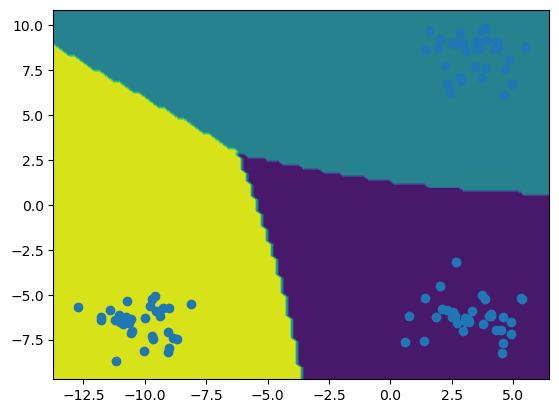

In [41]:
from sklearn.inspection import DecisionBoundaryDisplay

disp= DecisionBoundaryDisplay.from_estimator(classifier,Xs_easy)
grafica(Xs_easy)

### Exercise 1.4: A harder dataset

Repeat the exercises above, but first generate a **hard** dataset that is not linearly separable. Observe how linear classifiers fail to correctly classify the training data. How can we make these classifiers capable of "solving" this harder dataset?

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        33

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



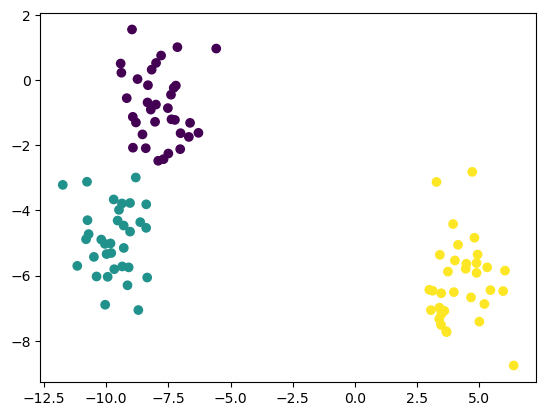

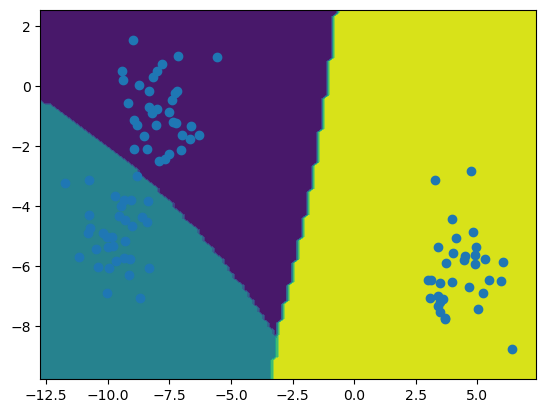

In [42]:
import random
X_hard = []
for i in range(0,99):
    n = random.random()
    X_hard.append(n)
Y_hard = []
for i in range(0,99):
    n = random.random()
    Y_hard.append(n)
    
    
(X_hard, Y_hard) = make_blobs(n_samples=100, n_features=2)
plt.scatter(X_hard[:,0], X_hard[:,1], c=Y_hard)


#classifier
classifier2=QuadraticDiscriminantAnalysis()
classifier2.fit(X_hard,Y_hard)
print(classification_report(Y_hard,classifier2.predict(X_hard)))

disp2= DecisionBoundaryDisplay.from_estimator(classifier2,X_hard)
grafica(X_hard)

---
## Part 2: A Real Dataset

In the second set of exercises we will work with a classic dataset for classification: the Iris Flower Classification Dataset. It is a fairly easy dataset to work with since it is low-dimensional and small. We start by loading the dataset, and then proceed with our usual protocol: "playing" with the data, creating train/test splits, and building and evaluating a first classifier. 

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

# Load the iris classification dataset to get started.
ds = load_iris()

# Extract the features (Xs), targets (ys), and class names (labels).
Xs = ds.data
ys = ds.target
classes = ds.target_names

# Make a Pandas DataFrame too, just for shits and giggles.
df = pd.DataFrame(Xs, columns=ds.feature_names)
targets = pd.Series(ds.target)

### Exercise 2.1: Play with the data

Use everything we have learned about *exploratory data analysis* to study the nature and characteristics of this classification problem. Are the classes equally represented? How many features are there in input? **Be creative** and **summarize** your findings with analysis along the way.

In [44]:
ds.keys()
#print(ds.DESCR)
ds.target_names
ds.target
ds.data.shape

(150, 4)

**Analysis:** The dataset has 4 numeric and predictive attributes (sepal length in cm,sepal width in cm, petal length in cm and petal width in cm) and a class. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant (setosa, versicolor, virginica). ds.data contains 150 rows of 4 columns (input features)

In [45]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Analysis:** The scales of this features are all the same (cm). Each class of iris plant is represented with the same amount of data.

### Exercise 2.2: Your Turn

Design an experiment to decide which of the three classifiers we have seen performs best on this dataset. Some things to keep in mind:
+ You will probably want to use [sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to perform K-fold cross-validation to ensure you are *robustly* estimating performance.
+ All three of the classifier models we have used support **regularization**, which might be an interesting hyperparameter to cross-validate. Unfortunately they use slightly different terminologies:
  + in `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` it is called `shrinkage`
  + in `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis` it is called `reg_param`
  + and in `sklearn.svm.LinearSVC` it is called `C` -- but the regularization performed is 1/C!
  
**Important**: Remember to *document* your findings and analyses along the way. Summarize and justify your final conclusions.

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import arange
ld=LinearDiscriminantAnalysis(solver='lsqr')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid=dict()
grid['shrinkage']=arange(0,1,0.01)
search = RandomizedSearchCV(ld, grid, scoring='accuracy', cv=cv, n_jobs=-1)
#summarize result
results = search.fit(Xs, ys)
#summarize
print('Config: %s' % results.best_params_)

def cross_param(ld,grid, Xs,ys):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    search = RandomizedSearchCV(ld, grid, scoring='accuracy', cv=cv, n_jobs=-1)
    results = search.fit(Xs, ys)
    #summarize
    print('Config: %s' % results.best_params_)
    



Config: {'shrinkage': 0.09}


**Analysis:** First we want to cross-validate our hyperparameter "shrinkage", to do this we can use GridSearchCV
this function searches for best set of hyperparameters from a grid of hyperparameters values but it will go through all the intermediate combinations of hyperparameters which makes grid search computationally very expensive. To fix this we can use RandomizedSearchCV, this funcition goes through only a fixed number of hyperparameter settings to find the best set.
Once we use RandomizedSearchCV we can use the best value for our hyperparameter. I run the code and the best parameter was 0.11

In [80]:
lda = LinearDiscriminantAnalysis(solver='lsqr',shrinkage=0.11)
def eval(lda,Xs,ys):
    results = lda.fit(Xs,ys)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(lda,Xs,ys,cv=cv,verbose=3,n_jobs=4)
    print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))
    
eval(lda,Xs,ys)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


0.9822 accuracy with a standard deviation of 0.0295


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    1.2s finished


**Analysis:** We use K-fold cross-validation to estimate the performance of the classifier with the shrinkage value that we got before. This way we get the expected accuracy of the model on out-of-training data, 0.9822 of accuracy. For both the cross-validation of the regularization parameter and this K-fold crossvalidation we can define functions that we will use with the rest of the classifier

In [68]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
lq=QuadraticDiscriminantAnalysis()
grid=dict()
grid['reg_param']=arange(0,1,0.01)
cross_param(lq,grid,Xs,ys)

Config: {'reg_param': 0.25}


**Analysis:** We repeat the strategy done before with de Linear Analysis but now with the Quadratic Discriminant Analysis. We get that the best value for the regularization parameter 'reg_param' is 0.17.

In [82]:
qda = QuadraticDiscriminantAnalysis(reg_param=0.17)
eval(qda,Xs,ys)

0.9578 accuracy with a standard deviation of 0.0530


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.0s finished


**Analysis:** The accuracy of this type of classifier with the regularization value 0.17 is 0.9578, worse that the LinearDiscriminantAnalysis.

In [71]:
from sklearn.svm import LinearSVC

ls=LinearSVC(max_iter=100000)
grid=dict()
grid['C']=arange(0.1,10,0.1)
cross_param(ls,grid,Xs,ys)

Config: {'C': 9.9}


**Analysis:** In the case of LinearSVC we need to remember that the regularization is inversely proportional to C. The results give us 0.3 as the best value for C.

In [84]:
model = LinearSVC(C=0.3)
eval(model,Xs,ys)

0.9600 accuracy with a standard deviation of 0.0369


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  23 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.0s finished


**Final Analysis:** As we can see the accuracy of the model with de LinearSVC classifier is 0.96, the accuracy of the LDA 0.9822 and the QDA 0.9578. This way it is easy to see that the LDA performs better on this dataset.

---
## Part 3: A Harder Dataset

OK, now let's switch to a the **digits** dataset which should be a bit more challenging. This should be easy by now, and if you have been careful about **functional abstraction** you should be able to reuse much of the functionality from above.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits

ds_digits = load_digits()
df_digits = pd.DataFrame(ds_digits.data)     # Why are there no column names?
targets_digits = pd.Series(ds_digits.target)
Xs_digits = ds_digits.data
ys_digits = ds_digits.target

### Exercise 3.1: Exploratory data analysis

You know the drill, see what this dataset is made of.

In [53]:
ds_digits.keys()
#print(ds_digits.DESCR)
ds_digits.target_names
ds_digits.target
ds_digits.data.shape
df_digits.describe()


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


**Analysis:** The dataset has 64 attributes that confirm a 8x8 matrix of integer pixels and 10 classes. ds_digits.data contains 1797 rows of 64 columns (input features).

### Exercise 3.2: Visualize Some Images

Now we are working with (very small) images. There a useful Matplotlib function for visualizing images is `imshow()`. Use it like this:

 `plt.imshow(df_digits.iloc[0,:].to_numpy().reshape(8,8), cmap='gray')`

 **NOTE**: The Pandas DataFrame structure is kind of getting in our way here -- we have to extract a row, then **convert** it to a numpy array, and then **resize** it to (8,8) to view it.

View some images from the dataset.

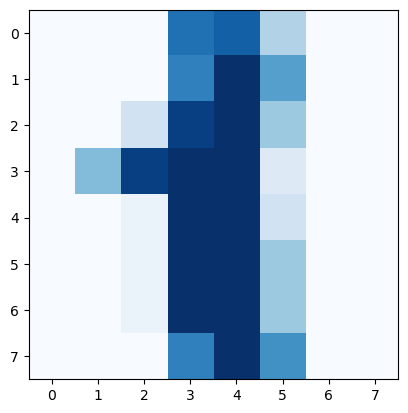

In [54]:
plt.imshow(df_digits.iloc[0,:].to_numpy().reshape(8,8), cmap='gray')
plt.imshow(df_digits.iloc[1,:].to_numpy().reshape(8,8), cmap='Blues')
#plt.imshow(df_digits.iloc[2,:].to_numpy().reshape(8,8), cmap='gray')

### Exercise 3.3: Find the best classifier (of the three we have seen)

You should now be very familiar with this game and if you consolidated the pieces you used before, this exercise should be easy. As always, document, summarize, and justify your conclusions and analyses.

In [75]:
#LDA
ld2=LinearDiscriminantAnalysis(solver='lsqr')
grid=dict()
grid['shrinkage']=arange(0,1,0.01)
cross_param(ld2,grid,Xs_digits,ys_digits)

Config: {'shrinkage': 0.07}


**Analysis:** First we cross-validate our hyperparameter and we get the value of 0.02 of shrinkage.

In [85]:
lda2 = LinearDiscriminantAnalysis(solver='lsqr',shrinkage=0.02)
eval(lda2,Xs_digits,ys_digits)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


0.9538 accuracy with a standard deviation of 0.0137


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.1s finished


**Analysis LDA:** Using the valeu we got from the cross-validation, we get a classifier with 0.9538 of accuracy.

In [76]:
#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
lq2=QuadraticDiscriminantAnalysis()
grid=dict()
grid['reg_param']=arange(0,1,0.01)
cross_param(lq2,grid,Xs_digits,ys_digits)

Config: {'reg_param': 0.67}


C:\Users\lucia\anaconda3\envs\FML\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


**Analysis:** Using the RandomizedSearchGridCV we get that the best parameter for reg_param is 0.68. We also get a warning that variables are collinear, this means that two or more variables are almost a linear combination of each other and sometimes it makes the estimated coefficients impossible to interpret or that our original data is not full rank.

In [87]:
qda2 = QuadraticDiscriminantAnalysis(reg_param=0.68)
eval(qda2,Xs_digits,ys_digits)

C:\Users\lucia\anaconda3\envs\FML\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


0.9911 accuracy with a standard deviation of 0.0053


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.1s finished


**Analysis:** Using the parameter we got before and using the Repeated Stratified K-Fold technique we get a model with a 0.9911 accuracy.

In [88]:
#LinearSVC
from sklearn.svm import LinearSVC
ls2=LinearSVC(max_iter=10000)
grid=dict()
grid['C']=arange(0.1,10,0.1)
cross_param(ls2,grid,Xs_digits,ys_digits)

Config: {'C': 0.9}


C:\Users\lucia\anaconda3\envs\FML\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**Analysis:** For the last classifier LinearSVC we repeat what we did before and we get a value of 2.7 for the regularization parameter C.

In [90]:
model2 = LinearSVC(C=2.7)
eval(model2,Xs_digits,ys_digits)

C:\Users\lucia\anaconda3\envs\FML\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


0.9532 accuracy with a standard deviation of 0.0184


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    1.1s finished


**Analysis:** The last classifier has an acurracy of 0.9527. Comparing it with the other 2 (LDA->0.9538 , QDA->0.9911) we can see that the QDA is the best classifier fitted to this dataset, but either way both the LDA and the LinearSVC have good results too.